## Import required packages

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

## Make a path for the directory

In [10]:
dir_data  = 'C:/Users/money/Downloads/PetImages/Training'
categories = ['Dog', 'Cat']

## Extract One image and convert into Greyscale

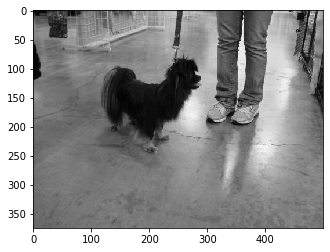

In [11]:
for i in categories: # Here i represents no. of folders in directory 
  our_path = os.path.join(dir_data, i) # Here join fn. joins the path of our category to the existing path
  for j in os.listdir(our_path): # Here j represents no. of files in a directory
    img_arr = cv2.imread(os.path.join(our_path, j), cv2.IMREAD_GRAYSCALE) # read each image and convert it into greyscale in RGB a 3x3 matrix is formed when we convert it into the greyscale we get only 2x2 matrix
    plt.imshow(img_arr, cmap='gray')

    break 
  break

In [12]:
print(img_arr)

[[  4  10  13 ... 165 163 161]
 [  8  14  17 ... 162 160 158]
 [  8  13  16 ... 160 158 156]
 ...
 [ 97  98 100 ... 115 115 115]
 [ 98  99  99 ... 116 116 116]
 [103 102 101 ... 112 112 112]]


In [13]:
print(img_arr.shape)

(375, 500)


## Reshae that image

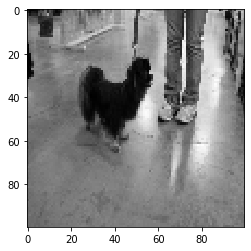

In [14]:
img_size = 100
new_arr = cv2.resize(img_arr, (img_size, img_size))
plt.imshow(new_arr, cmap='gray')

In [35]:
print(new_arr.shape)

(100, 100)


## Create Training Data

In [15]:
training_data = []

def create_training_data():

    for i in categories: # Here i represents no. of folders in directory 
        our_path = os.path.join(dir_data, i) # Here join fn. joins the path of our category to the existing path
        cat_num = categories.index(i) # Convert labels from string to no. i.e. Dog = 0, Cat = 1

        for j in tqdm(os.listdir(our_path)): # Here j represents no. of files in a directory. Tqdm represents the progress of the loop
            try:
                img_arr = cv2.imread(os.path.join(our_path, j), cv2.IMREAD_GRAYSCALE) # Read each image and convert it into greyscale in RGB a 3x3 matrix is formed when we convert it into the greyscale we get only 2x2 matrix
                new_arr = cv2.resize(img_arr, (img_size, img_size)) # Resize the image
                training_data.append([new_arr, cat_num])
            except Exception as e:
                pass


create_training_data()

100%|███████████████████████████████████████████████████████████████████████████| 12400/12400 [01:49<00:00, 113.01it/s]


## Balance The data

In [16]:
count_dog = 0
count_cat = 0
for a,b in training_data:
    if b == 0:
        count_dog += 1
    if b == 1:
        count_cat += 1

while True:
    if (count_dog > count_cat):
        training_data.pop(0)
        count_dog -= 1
        
    if (count_dog < count_cat):
        training_data.pop()
        count_cat -=1
        
    if(count_dog == count_cat):
        break


## Shuffle The Data

In [17]:
import random
random.shuffle(training_data)

In [18]:
for a,b in training_data[:10]:
    print(b) # b represents the category number

0
0
1
1
1
1
1
0
1
0


## Create the features and labels

In [19]:
x = [] # Features(images dataset) : training_data[0]
y = [] # Labels(category dataset) : training_data[1]


In [20]:
for features, labels in training_data:
    x.append(features)
    y.append(labels)

## Reshape the data in x 

In [21]:
x[0] # we can't pass the list of features to the NN so we have to reshape the data 

array([[ 94,  86, 169, ..., 100, 107, 113],
       [102,  93, 139, ..., 176, 179, 148],
       [101, 103, 101, ..., 168, 155, 105],
       ...,
       [182, 144, 193, ..., 180, 166, 186],
       [180, 164, 176, ..., 193, 196, 185],
       [214, 176, 180, ..., 190, 184, 181]], dtype=uint8)

In [22]:
x = np.array(x).reshape(-1, img_size, img_size, 1)

In [23]:
y = np.array(y)

In [24]:
x[0]

array([[[ 94],
        [ 86],
        [169],
        ...,
        [100],
        [107],
        [113]],

       [[102],
        [ 93],
        [139],
        ...,
        [176],
        [179],
        [148]],

       [[101],
        [103],
        [101],
        ...,
        [168],
        [155],
        [105]],

       ...,

       [[182],
        [144],
        [193],
        ...,
        [180],
        [166],
        [186]],

       [[180],
        [164],
        [176],
        ...,
        [193],
        [196],
        [185]],

       [[214],
        [176],
        [180],
        ...,
        [190],
        [184],
        [181]]], dtype=uint8)

## Save the Dataset

In [25]:
"""import pickle
# To save
pickle_out =  open("x.pickle", 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out =  open("y.pickle", 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# To recall
pickle_in = open("x.pickle", 'rb')
x = pickle.load(pickle_in)
"""

'import pickle\n# To save\npickle_out =  open("x.pickle", \'wb\')\npickle.dump(x, pickle_out)\npickle_out.close()\n\npickle_out =  open("y.pickle", \'wb\')\npickle.dump(y, pickle_out)\npickle_out.close()\n\n# To recall\npickle_in = open("x.pickle", \'rb\')\nx = pickle.load(pickle_in)\n'

In [26]:
# No need if you are going in one flow 

## Make a CNN

### Import required libraries

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### Normalize

In [28]:
x = x/255.0   # To normalize

In [29]:
print(x[0])

[[[0.36862745]
  [0.3372549 ]
  [0.6627451 ]
  ...
  [0.39215686]
  [0.41960784]
  [0.44313725]]

 [[0.4       ]
  [0.36470588]
  [0.54509804]
  ...
  [0.69019608]
  [0.70196078]
  [0.58039216]]

 [[0.39607843]
  [0.40392157]
  [0.39607843]
  ...
  [0.65882353]
  [0.60784314]
  [0.41176471]]

 ...

 [[0.71372549]
  [0.56470588]
  [0.75686275]
  ...
  [0.70588235]
  [0.65098039]
  [0.72941176]]

 [[0.70588235]
  [0.64313725]
  [0.69019608]
  ...
  [0.75686275]
  [0.76862745]
  [0.7254902 ]]

 [[0.83921569]
  [0.69019608]
  [0.70588235]
  ...
  [0.74509804]
  [0.72156863]
  [0.70980392]]]


### Model

In [30]:
print(x.shape)
print(x.shape[1:])

(24738, 100, 100, 1)
(100, 100, 1)


In [31]:
model = Sequential() #we are using a sequential model here.

model.add(Conv2D(32, (3,3), input_shape = x.shape[1:]))
#Conv2D layer with 32 nodes and kernel size of (3,3).You can also experiment with different values here like 32, 64, 128 but powers of 2.
#Also we have to specify input shape so we take x shape[1:] because x.shape[0] represents the no. of sets.
model.add(Activation('relu')) # Activation = Rectified Linear Unit(relu)
model.add(MaxPooling2D(pool_size = (2,2))) # We do max pooling here. It is done only after convolutional layer is completed.

# Add another layer
model.add(Conv2D(32, (3,3), activation = 'relu'))# We can activate our layer in the same line also.
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another layer
model.add(Conv2D(32, (3,3), activation = 'relu'))# We can activate our layer in the same line also.
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten()) # This converts our 3D feature maps to 1D feature vectors so that we can feed our data to Dense Layer.

model.add(Dense(1, activation = 'sigmoid')) # We add a final output layer. Here activation can be sigmoid or softmax.

# Compile the Model 
model.compile(optimizer = 'adam', loss  = 'binary_crossentropy', metrics = ['accuracy'])
# To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a adam.
# To make our model better we either minimize loss or maximize accuracy. NN always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy because the dataset is binary (Dog, Cat)  
# Metrics is to denote the measure of your model. Our focus is on accuracy. 


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
model.fit(x, y, epochs=10, validation_split=0.2, batch_size=32, verbose = 2)
# Epochs means iterations
# Validation_split means total of 20 % data will remain for testing.
# We tarin in batches because passing each image will take a lot of time.
# Verbose is for how output of fit function is displayed.  

Train on 19790 samples, validate on 4948 samples
Epoch 1/5
19790/19790 - 173s - loss: 0.6194 - acc: 0.6446 - val_loss: 0.5391 - val_acc: 0.7352
Epoch 2/5
19790/19790 - 170s - loss: 0.5095 - acc: 0.7503 - val_loss: 0.4879 - val_acc: 0.7656
Epoch 3/5
19790/19790 - 171s - loss: 0.4607 - acc: 0.7845 - val_loss: 0.4644 - val_acc: 0.7755
Epoch 4/5
19790/19790 - 171s - loss: 0.4355 - acc: 0.7985 - val_loss: 0.4393 - val_acc: 0.7926
Epoch 5/5
19790/19790 - 179s - loss: 0.4055 - acc: 0.8163 - val_loss: 0.4125 - val_acc: 0.8088


In [33]:
model.save("Cat_vs_Dog_model_new")

## Testing

### Prepare the test case

In [36]:
def test_case_prepration(file_path):
    img_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 1)

### Predict the Image

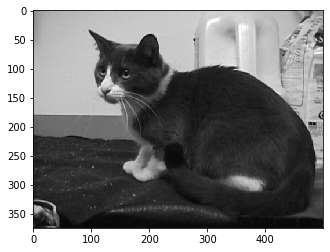

Cat


In [41]:
prediction = model.predict(test_case_prepration('4.jpg')) # Here I am not typing full path because the file is in the same directory.
print(categories[int(prediction[0][0])]) # we do this because the prediction is a 2 dim list.